# Clustering

## Load data
Four objects are loaded:
1. 'data/prepped.pkl' is a pickled dataframe containing cleaned comments and their subreddit label
2. LSA, pLSA, and LDA are numpy arrays containing several features (taking the form of a real number) extracted from each comment. These are the versions with comments agglomerated by subreddit.

In [44]:
import numpy as np
import pandas as pd
from time import time
import pickle

print("Importing data...")
t0 = time()
data_comments = pd.read_pickle('data/prepped.pkl')
data = pd.read_pickle('data/prepped_sub.pkl')
LSA = np.load('data/X_LSA_sub.npy')
pLSA = np.load('data/X_pLSA_sub.npy')
LDA = np.load('data/X_LDA_sub.npy')
doc2vec = np.load('data/doc2vec_sub.npy')
print("done in %0.3fs" % (time()-t0))

# assert(data.shape[0] == LSA.shape[0])
# assert(data.shape[0] == pLSA.shape[0])
# assert(data.shape[0] == LDA.shape[0])


Importing data...
done in 6.966s


## Clulstering method evaluation
Clustering methods are compared for each feature extraction method.
1. A memory-efficient KMeans algorithm
2. Birch, a memory-efficient, tree-based method

They are compared using the average of the Silhouette scores.

In [46]:
from sklearn.cluster import MiniBatchKMeans, Birch
from sklearn.metrics import silhouette_score

n_samples = data.shape[0]
n_recommended = 5
n_clusters = round(n_samples / n_recommended)

# n_clusters = 100

extractors = [("LSA",LSA),
              ("pLSA",pLSA),
              ("LDA",LDA),
              ("doc2vec",doc2vec)
             ]

clusterers = [("kmeans", MiniBatchKMeans(n_clusters=n_clusters, # 8
                                         init='k-means++', 
                                         max_iter=100, 
                                         batch_size=100, 
                                         verbose=0, 
                                         compute_labels=True, 
                                         random_state=0, # None
                                         tol=0.0, 
                                         max_no_improvement=10, 
                                         init_size=(3*n_clusters), # None
                                         n_init=3, 
                                         reassignment_ratio=0.01
                                        ) ),
              ("birch", Birch(threshold=0.05,
                              branching_factor=50, 
                              n_clusters=n_clusters, 
                              compute_labels=True, 
                              copy=True,
                             ) ),
             ]

ex_preds = {}
for ex_name, X in extractors:
    print(ex_name)
    print()
    
    cl_preds = {}
    for cl_name, clusterer in clusterers:    
        print(cl_name)
        t0 = time()
        clusterer.fit(X)
        t1 = time()
        preds = clusterer.predict(X)
        t2 = time()
        score = silhouette_score(X, preds) #, sample_size=round(0.01*n_samples), random_state=0)
        t3 = time()
        
        cl_preds[cl_name] = (clusterer, preds, score)
        
        print("Fit time  : %0.3f sec" % (t1-t0))
        print("Pred time : %0.3f sec" % (t2-t1))
        print("Score time: %0.3f sec" % (t3-t2))
        print("Score     : %0.3f" % score)
        print()
    ex_preds[ex_name] = cl_preds


LSA

kmeans
Fit time  : 0.380 sec
Pred time : 0.003 sec
Score time: 1.111 sec
Score     : 0.198

birch
Fit time  : 0.095 sec
Pred time : 0.005 sec
Score time: 1.116 sec
Score     : 0.235

pLSA

kmeans
Fit time  : 0.352 sec
Pred time : 0.003 sec
Score time: 1.024 sec
Score     : 0.229

birch
Fit time  : 0.024 sec
Pred time : 0.001 sec
Score time: 0.077 sec
Score     : 0.279

LDA

kmeans


C:\Users\sfzba\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:629: UserWarning: Number of subclusters found (42) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))


Fit time  : 0.272 sec
Pred time : 0.004 sec
Score time: 1.064 sec
Score     : 0.558

birch
Fit time  : 0.026 sec
Pred time : 0.000 sec
Score time: 0.026 sec
Score     : 0.973

doc2vec

kmeans


C:\Users\sfzba\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:629: UserWarning: Number of subclusters found (2) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))


Fit time  : 0.303 sec
Pred time : 0.003 sec
Score time: 1.126 sec
Score     : 0.134

birch
Fit time  : 0.116 sec
Pred time : 0.010 sec
Score time: 1.046 sec
Score     : 0.182



## Clustering analysis

In [67]:
# Choose model to analyze
_, preds, _ = ex_preds["LSA"]["birch"]
X = LSA

### List subreddits in each cluster

In [68]:
import pprint
for i in range(max(preds)+1):
    pprint.pprint(data.iloc[preds==i,1].tolist())

['Wellthatsucks',
 'holdmybeer',
 'UnethicalLifeProTips',
 'WhitePeopleTwitter',
 'Unexpected',
 'WTF',
 'Whatcouldgowrong',
 'HumansBeingBros',
 'mildlyinteresting',
 'gifs',
 'funny',
 'CasualUK']
['marvelstudios',
 'DC_Cinematic',
 'PrequelMemes',
 'DCcomics',
 'comicbooks',
 'anime',
 'TwoBestFriendsPlay',
 'whowouldwin',
 'Marvel',
 'StarWars']
['weedstocks',
 'churning',
 'dubai',
 'AirForce',
 'GothamElections',
 'Accounting',
 'ApplyingToCollege',
 'Sat',
 'uwaterloo',
 'Teachers',
 'singapore',
 'space',
 'math',
 'premed',
 'medicalschool']
['GreenBayPackers',
 'bengals',
 'detroitlions',
 'miamidolphins',
 'NYGiants',
 'Colts',
 'minnesotavikings',
 'ravens',
 'DenverBroncos',
 'Tennesseetitans',
 'MaddenMobileForums',
 'steelers',
 'MaddenUltimateTeam',
 'oaklandraiders',
 'FloridaGators',
 'Seahawks',
 'falcons',
 'Saints',
 'cowboys',
 'buccaneers']
['BabyBumps',
 'beyondthebump',
 'raisedbynarcissists',
 'aspergers',
 'bipolar',
 'JUSTNOMIL',
 'Anxiety']
['ImGoingToHellF

### Wordclouds and frequency distributions

Cluster number 0:


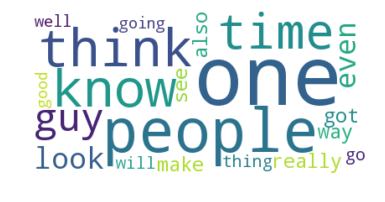

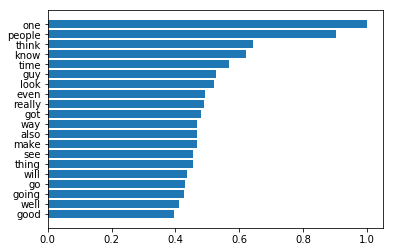

Cluster number 1:


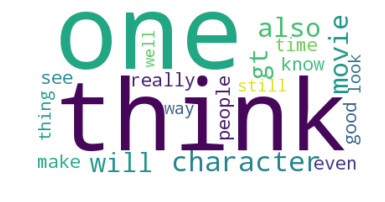

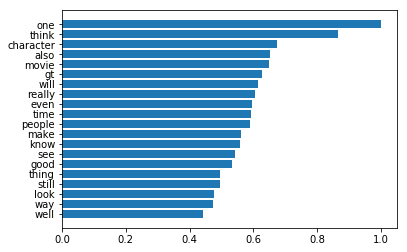

Cluster number 2:


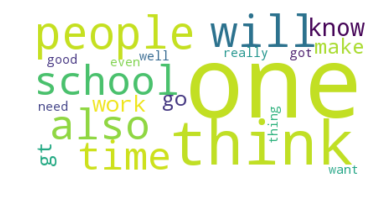

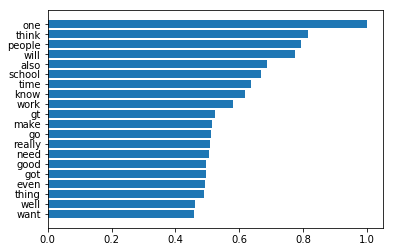

Cluster number 3:


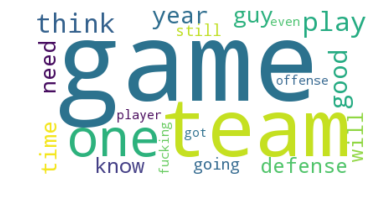

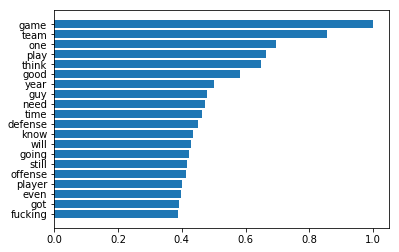

Cluster number 4:


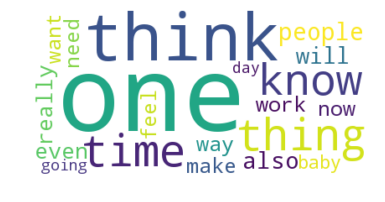

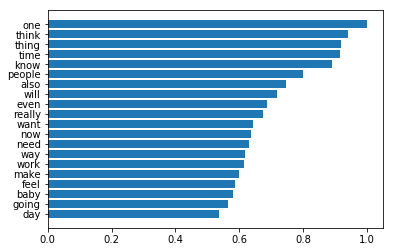

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
max_words = 20
wc = WordCloud(background_color="white", max_words=max_words)

#for i in range(max(preds)+1):
for i in range(5):
    print("Cluster number {}:".format(i))
    wc.generate(data[preds==i].body.str.cat(sep=' '))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    words = []
    freqs = []
    for word in wc.words_:
        if wc.words_[word]!=0:
            words.append(word)
            freqs.append(wc.words_[word])
    x = range(max_words,0,-1)
    plt.barh(x,freqs[:max_words])
    plt.yticks(x, np.asarray(words[:max_words]))
    plt.show()

### tSNE visualization

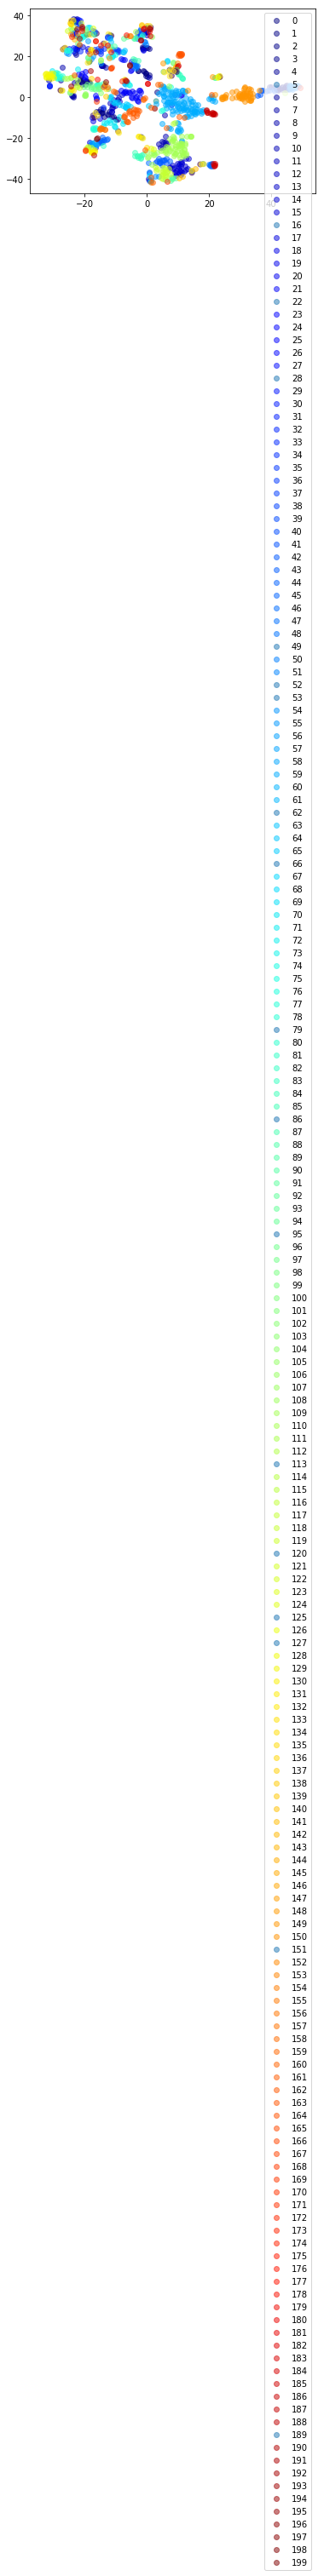

In [72]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
indices = range(max(preds)+1)
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1.0, len(indices)))
for i, color in zip(indices, colors):
    plt.scatter(X_embedded[preds==i,0],X_embedded[preds==i,1],c=color,label=i,alpha=0.5) # 'C{}'.format(i)
plt.legend()
plt.show()


## Approximate Nearest Neighbors


In [59]:
from annoy import AnnoyIndex

ann_input = LSA

indx = AnnoyIndex(ann_input.shape[1], metric='angular')

print("Building Annoy index...")
t0 = time()
for i, row in enumerate(ann_input):
    indx.add_item(i,row)
indx.build(50)
print("done in %0.3fs" % (time()-t0))


Building Annoy index...
done in 0.330s


In [64]:
test_ix = 501
n_recommended = 6

print("Given /r/%s, I recommend..." % data.iloc[test_ix,1])
ixs, dists = indx.get_nns_by_item(test_ix, n_recommended, search_k=-1, include_distances=True)

for ix, dist in zip(ixs[1:], dists[1:]):
    print("/r/%s, at a distance of %0.6f" % (data.iloc[ix,1], dist))

Given /r/SeattleWA, I recommend...
/r/nyc, at a distance of 0.124173
/r/Denver, at a distance of 0.132864
/r/chicago, at a distance of 0.141125
/r/boston, at a distance of 0.161207
/r/Calgary, at a distance of 0.163045
